In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper Libraries
import numpy as np
import matplotlib.pyplot as plt

# Identifying Version
print(tf.__version__)

In [ ]:
# Import the Fashion MNIST dataset

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Class Name:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Exploring with Datas**

60,000 images with 28x28 pixels

In [115]:
train_images.shape

(60000, 28, 28)

In [116]:
len(train_labels)

60000

In [117]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [118]:
test_images.shape

(10000, 28, 28)

In [119]:
len(test_labels)

10000

**Preprocess the data

Removing the pixel value from 255 to grayscale by diving the values by 255.

Important the training set and the testing set are preprocessed in the same way. 

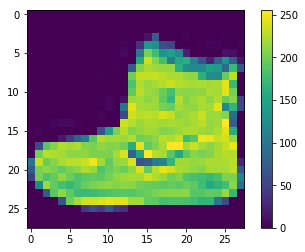

In [120]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [121]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Display the first 25 images and the class name below each image. 

For verifying that the data is in the correct format. 

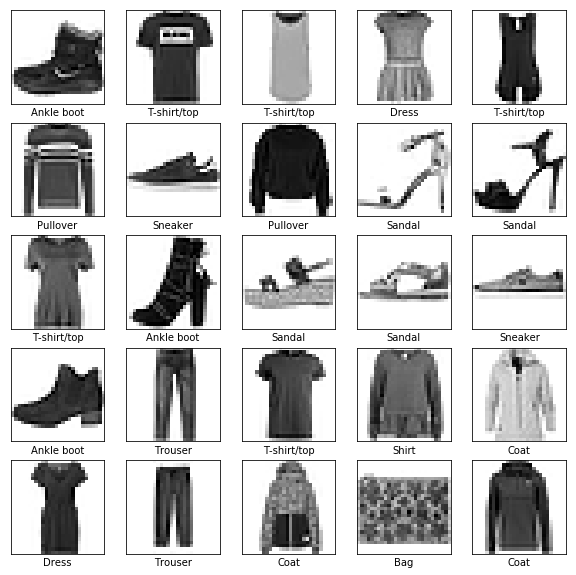

In [122]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) #showing image
    plt.xlabel(class_names[train_labels[i]]) #showing label
plt.show()

In [123]:
#Building Models

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

**Model *Compile* Stage:**
* Loss function: Measuring how accurate the model is during testing. We want to minimize the function to "steer" the model in the right function.
* Optimizer: This is how the model is updated based on  the data and its loss function.
* Metrics: Used to monitor the training and testing apps. Currently, it uses *accuracy*, the fraction of the images that are correctly classified. 

In [124]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Train the Model**

1. Feed the training data to the model (`train_images & train_labels` arrrays).
2. The model learns to associate images and labels. 
3. We ask the model to predict about a test set (`test_images`). Then, we verify that the predictions match the labels from the test_lables array. 

In [125]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.5006 - accuracy: 0.8238
Epoch 2/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3754 - accuracy: 0.8654
Epoch 3/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3372 - accuracy: 0.8759
Epoch 4/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3128 - accuracy: 0.8845
Epoch 5/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2962 - accuracy: 0.8894
Epoch 6/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2811 - accuracy: 0.8957
Epoch 7/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2696 - accuracy: 0.8994
Epoch 8/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2591 - accuracy: 0.9027
Epoch 9/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2498 - accuracy: 0.9071
Epoch 10/10
60

In [126]:
#Evaluating Accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:',test_acc)

10000/10000 [==============================] - 0s 14us/sample - loss: 0.3340 - accuracy: 0.8819
Test accuracy: 0.8819


In [127]:
#Make Predictions

predictions = model.predict(test_images)
predictions[0]

array([3.6853580e-06, 1.7919758e-07, 1.1160771e-06, 2.6282299e-07,
       3.7222553e-06, 9.2594782e-03, 1.9189560e-05, 7.2120078e-02,
       3.0878425e-04, 9.1828352e-01], dtype=float32)

Prediction is an array of 10 numbers. These numbers describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothings. The line below shows which label has the highest confidence value. 

In [128]:
np.argmax(predictions[0])

9

In [129]:
#Checking the test label to see this is correct
test_labels[0]

9

In [146]:
#Graphing Preparation to look at the full set of 10 class predictions

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else: 
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                 100*np.max(predictions_array),
                                 class_names[true_label]),
                                 color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

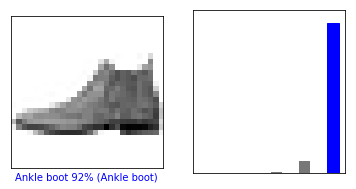

In [147]:
#Looking at the 0th image, predictions, and prediction array

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

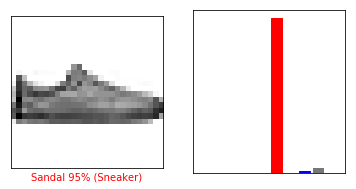

In [148]:
#12th image

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

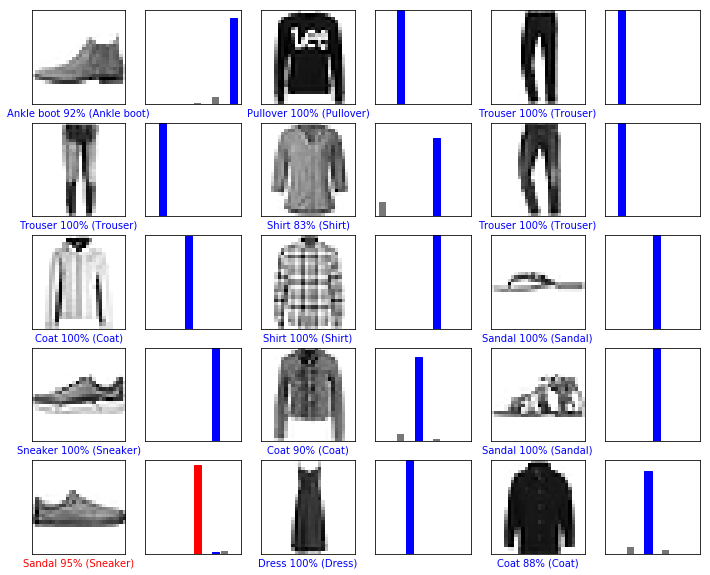

In [149]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

Using the trained model to make a prediction about a single image. 

In [150]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [151]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [152]:
# Predicting the image
predictions_single = model.predict(img)

print(predictions_single)

[[3.6853580e-06 1.7919776e-07 1.1160761e-06 2.6282348e-07 3.7222553e-06
  9.2594735e-03 1.9189541e-05 7.2120011e-02 3.0878378e-04 9.1828352e-01]]


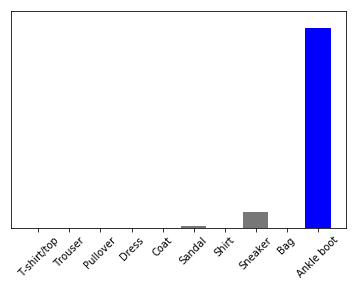

In [153]:
# Creating Bar Graph
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

`model.predict` returns a list of lists, one for each image in the batch. 

In [154]:
# Grabbing the predictions for our (only) image in the batch
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
